In [20]:
import numpy as np
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt

titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# del titanic['Ticket']
# del titanic['Cabin']
# del titanic['Fare']

In [13]:
dict = {
    "male":1,
    "female":2
}
titanic["Gender"] = titanic["Sex"].map(dict)

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [25]:
age_mean = titanic[titanic.Survived==1].Age.mean()
titanic["Age"] = np.where(pd.isnull(titanic.Age) & titanic['Survived']==1,age_mean,titanic['Age'])
age_mean
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            125
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
age_mean_not_survived = titanic[titanic.Survived==0].Age.mean()
titanic.Age.fillna(age_mean_not_survived,inplace=True)
titanic.isnull().sum()

/tmp/ipykernel_32064/2675790347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.Age.fillna(age_mean_not_survived,inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
titanic.rename(columns={'Gender':'Sex'},inplace=True)

In [36]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]

/tmp/ipykernel_32064/3641937786.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
/tmp/ipykernel_32064/3641937786.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
/tmp/ipykernel_32064/3641937786.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]


In [38]:
not_survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
not_survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
not_survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]

/tmp/ipykernel_32064/2725105707.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
/tmp/ipykernel_32064/2725105707.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
/tmp/ipykernel_32064/2725105707.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]


In [41]:
titanic.dropna(inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [46]:
# del titanic['Ticket']
# del titanic['Cabin']
# del titanic['Fare']
del titanic['Name']

In [47]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [49]:
def getEmb(str):
   if str == "S":
     return 1
   elif str == "C":
     return 2
   else:
     return 3
titanic['Embark'] = titanic['Embarked'].apply(getEmb)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Embark
1,2,1,1,female,38.0,1,0,C,2
3,4,1,1,female,35.0,1,0,S,1
6,7,0,1,male,54.0,0,0,S,1
10,11,1,3,female,4.0,1,1,S,1
11,12,1,1,female,58.0,0,0,S,1


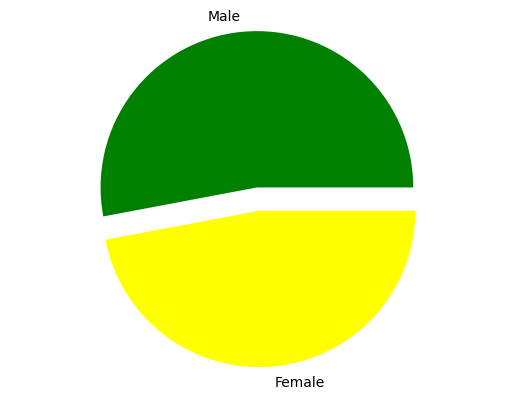

In [58]:
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()
p = [males, females]
plt.pie(p, labels = ['Male', 'Female'], colors = ['green', 'yellow'], explode = (0.15, 0), startangle = 0)
plt.axis('equal')
plt.show()

/tmp/ipykernel_32064/1742231374.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleS = titanic[titanic.Sex == 'male'][titanic.Survived == 1].shape[0]
/tmp/ipykernel_32064/1742231374.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleN = titanic[titanic.Sex == 'male'][titanic.Survived == 0].shape[0]
/tmp/ipykernel_32064/1742231374.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleS = titanic[titanic.Sex == 'female'][titanic.Survived == 1].shape[0]
/tmp/ipykernel_32064/1742231374.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleN = titanic[titanic.Sex == 'female'][titanic.Survived == 0].shape[0]


45
62
89
6


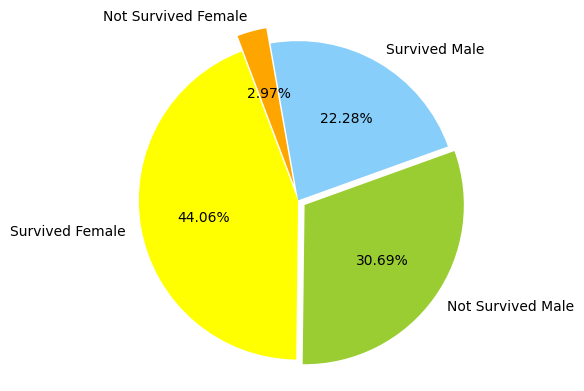

In [60]:
MaleS = titanic[titanic.Sex == 'male'][titanic.Survived == 1].shape[0]
MaleN = titanic[titanic.Sex == 'male'][titanic.Survived == 0].shape[0]
FemaleS = titanic[titanic.Sex == 'female'][titanic.Survived == 1].shape[0]
FemaleN = titanic[titanic.Sex == 'female'][titanic.Survived == 0].shape[0]
chart = [MaleS, MaleN, FemaleS, FemaleN] 
colors = ['lightskyblue', 'yellowgreen', 'Yellow', 'Orange']
labels = ['Survived Male', 'Not Survived Male', 'Survived Female', 'Not Survived Female']
explode = [0, 0.05, 0, 0.1]
plt.pie(chart, labels = labels, colors = colors, explode = explode, startangle = 100, counterclock = False, autopct = "%.2f%%")
plt.axis("equal")
plt.show()